In [1]:
import pytorch_lightning
import pandas as pd
import numpy as np
import scipy.stats as stats
import darts
from pytorch_lightning.callbacks import EarlyStopping, Callback, ModelCheckpoint
from darts.dataprocessing.transformers import Scaler
from darts.models import LightGBMModel
from darts import TimeSeries, concatenate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
#import tensorboard
#import os
from darts import TimeSeries
from darts.metrics.metrics import mape, mae, mse, ape
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import GaussianLikelihood
from darts.dataprocessing.transformers import Scaler
from darts.logging import get_logger, raise_log, raise_if_not
from darts.utils.missing_values import fill_missing_values
from darts.utils.utils import _build_tqdm_iterator
from darts.utils.data.inference_dataset import InferenceDataset

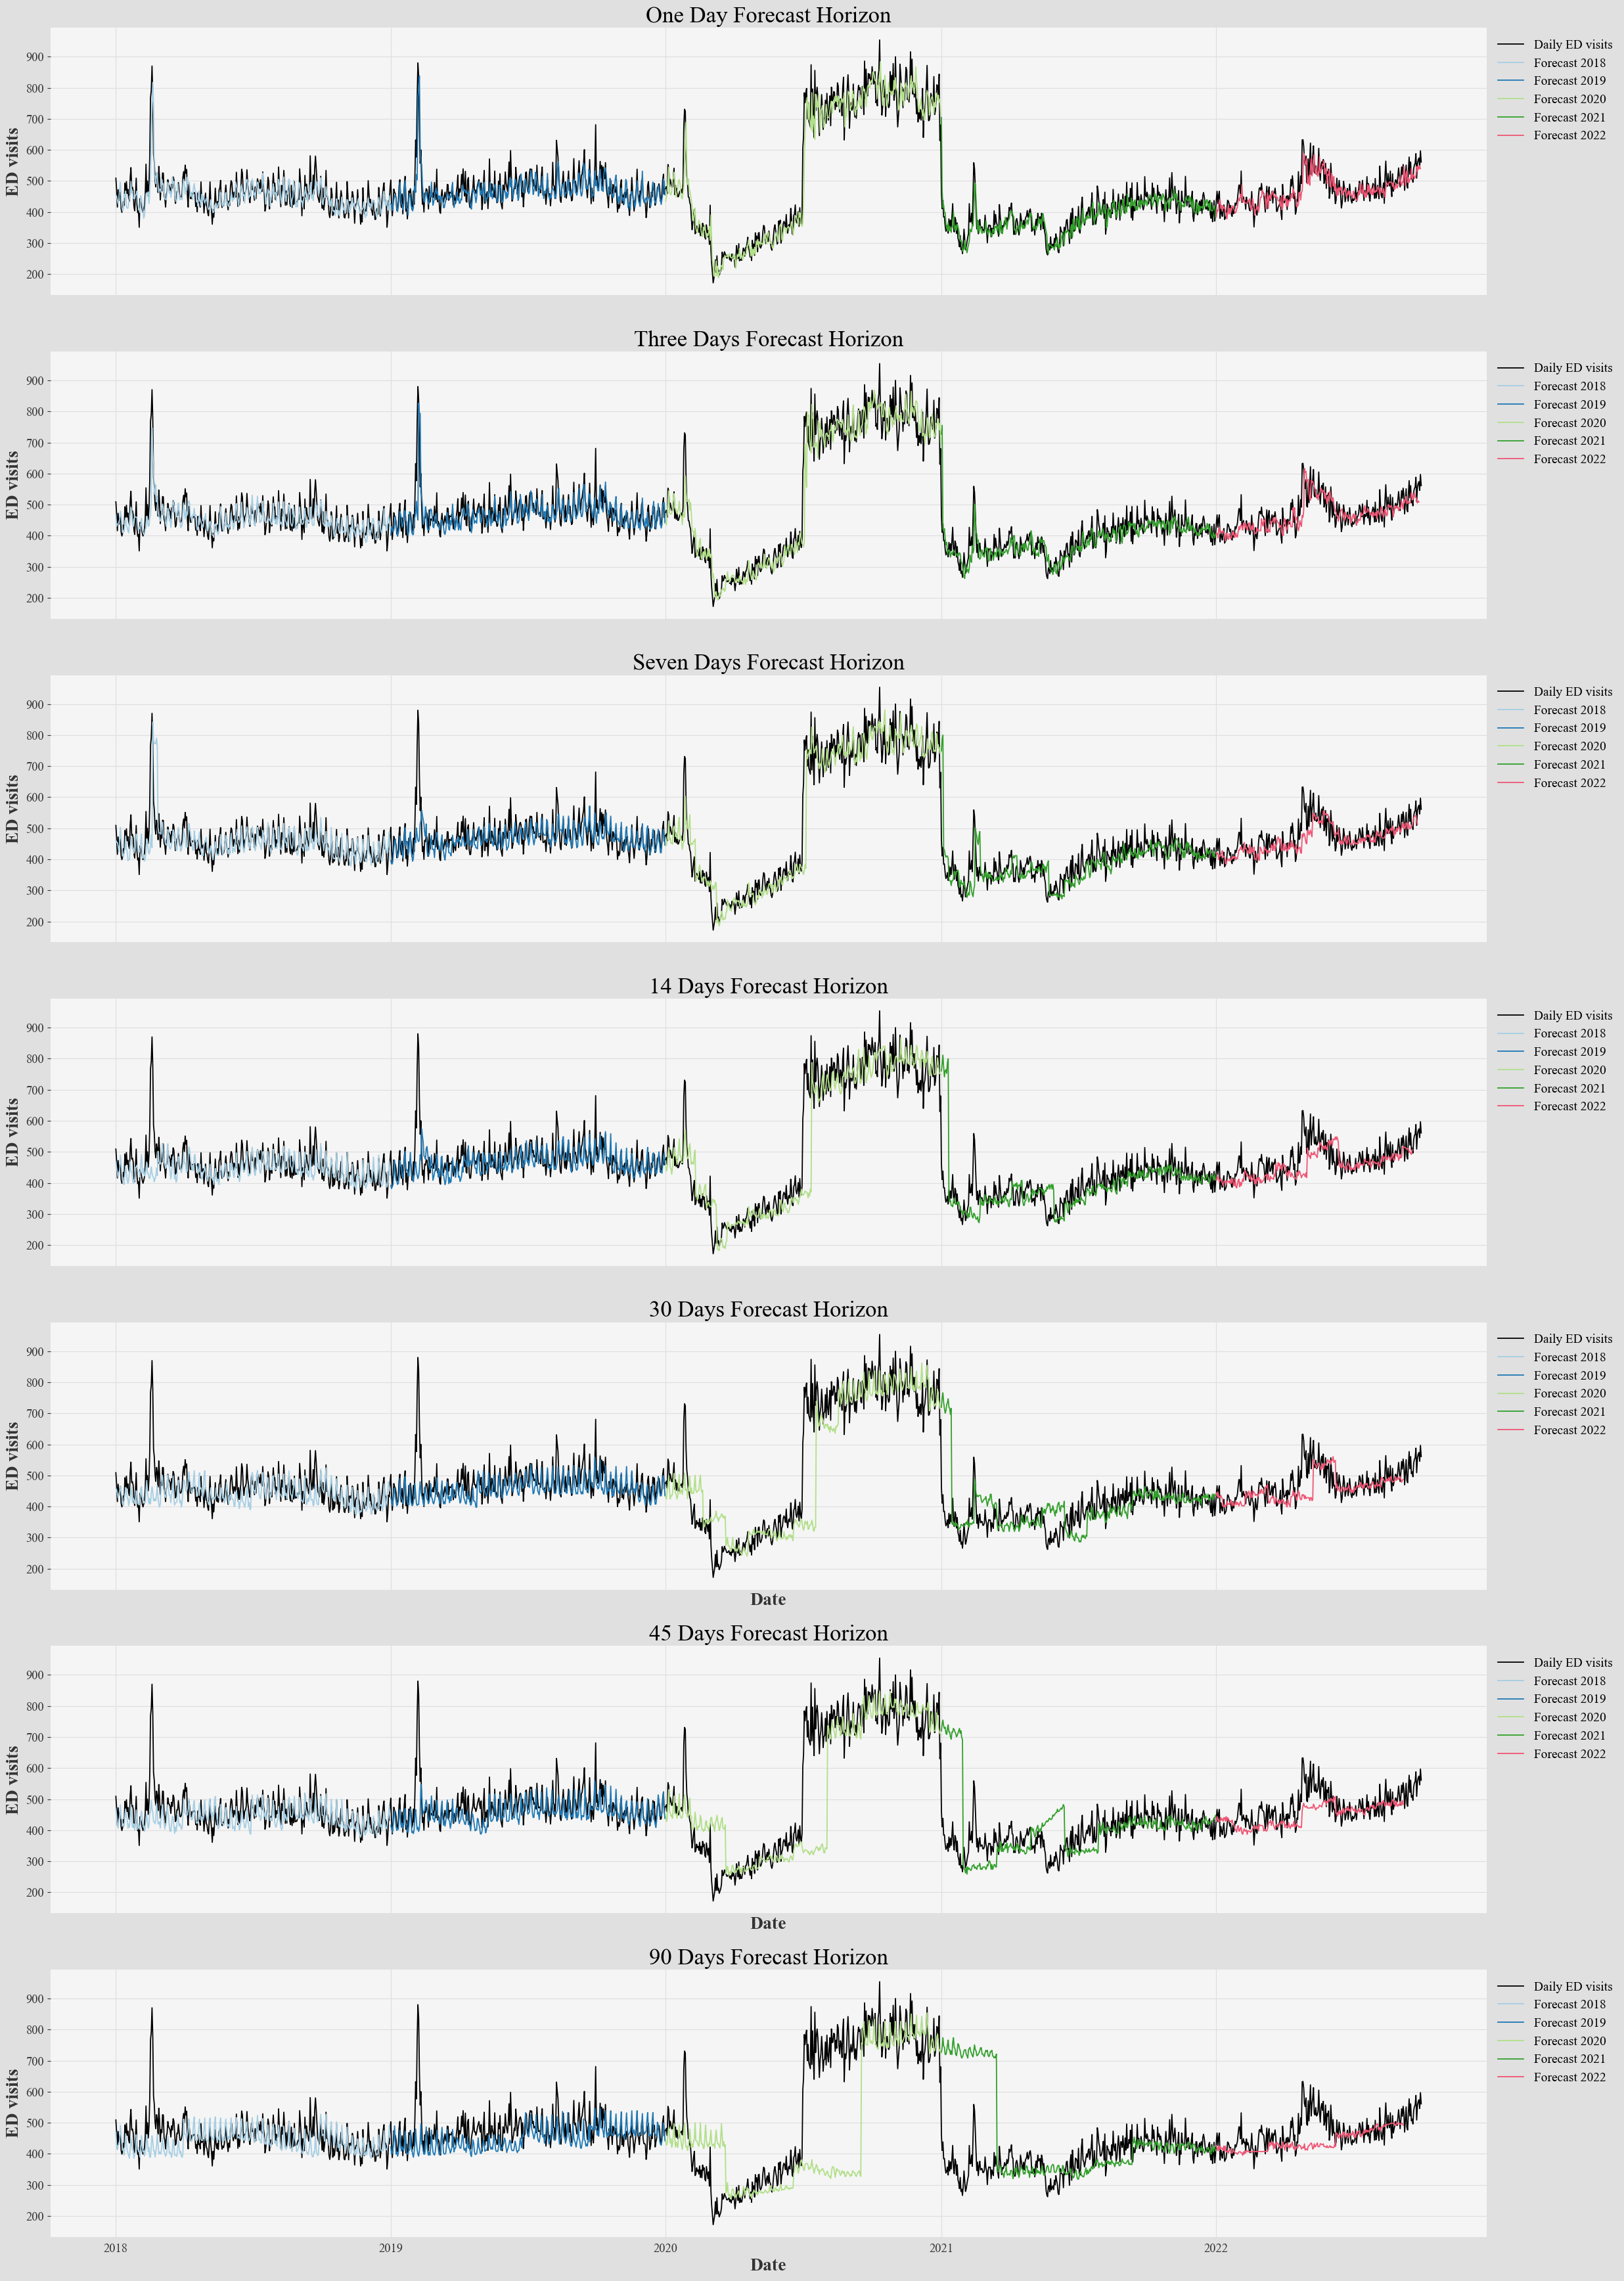

In [5]:
# Load original data
df = pd.read_csv('../DataSet/EDvisitfileLinkou.csv', encoding='ISO-8859-1')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.loc['2018-01-01':]
Original_series = df['No']

# Load model predictions
def load_predictions(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.loc['2018-01-01':]
    return df['No']


Chronos_series1 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH1.csv')
Chronos_series3 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH3.csv')
Chronos_series7 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH7.csv')
Chronos_series14 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH14.csv')
Chronos_series30 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH30.csv')
Chronos_series45 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH45.csv')
Chronos_series90 = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH90.csv')

# Prepare data for plotting by year
def prepare_yearly_series(series):
    yearly_series = {}
    for year in range(2018, 2023):
        yearly_series[year] = series.loc[f'{year}']
    return yearly_series

Chronos_yearly1 = prepare_yearly_series(Chronos_series1)
Chronos_yearly3 = prepare_yearly_series(Chronos_series3)
Chronos_yearly7 = prepare_yearly_series(Chronos_series7)
Chronos_yearly14 = prepare_yearly_series(Chronos_series14)
Chronos_yearly30 = prepare_yearly_series(Chronos_series30)
Chronos_yearly45 = prepare_yearly_series(Chronos_series45)
Chronos_yearly90 = prepare_yearly_series(Chronos_series90)

# Set global font properties
plt.rcParams.update({'font.size': 16, 'font.family': 'serif', 'font.serif': 'Times New Roman'})

fig, axes = plt.subplots(7, 1, figsize=(25, 35), sharex=True, facecolor='#E0E0E0')

# Plotting

# Define a color palette
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#ef5675']

# Plot original series and predictions by year
# Plot original series and predictions by year
def plot_with_yearly_predictions(ax, original, yearly_predictions, title, xlabel=False):
    ax.plot(original.index, original.values, label='Daily ED visits', color='black')
    for i, year in enumerate(range(2018, 2023)):
        yearly_data = yearly_predictions[year]
        ax.plot(yearly_data.index, yearly_data.values, label=f'Forecast {year}', color=colors[i])
    if xlabel:
        ax.set_xlabel('Date', fontsize=20, fontfamily='Times New Roman')
    ax.set_title(title, fontdict={'fontsize': 25, 'fontfamily': 'Times New Roman'})
    ax.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylabel('ED visits', fontsize=20, fontfamily='Times New Roman')
    ax.grid(True)
    ax.set_facecolor('#F5F5F5')  # 设置子图背景色

# Plot each model's predictions
plot_with_yearly_predictions(axes[0], Original_series, Chronos_yearly1, 'One Day Forecast Horizon')
plot_with_yearly_predictions(axes[1], Original_series, Chronos_yearly3, 'Three Days Forecast Horizon')
plot_with_yearly_predictions(axes[2], Original_series, Chronos_yearly7, 'Seven Days Forecast Horizon')
plot_with_yearly_predictions(axes[3], Original_series, Chronos_yearly14, '14 Days Forecast Horizon')
plot_with_yearly_predictions(axes[4], Original_series, Chronos_yearly30, '30 Days Forecast Horizon', xlabel=True)
plot_with_yearly_predictions(axes[5], Original_series, Chronos_yearly45, '45 Days Forecast Horizon', xlabel=True)
plot_with_yearly_predictions(axes[6], Original_series, Chronos_yearly90, '90 Days Forecast Horizon', xlabel=True)

plt.tight_layout()
plt.savefig('Fig5.png')
plt.show()